# 201501489 최영진

In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import pandas

In [2]:
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
#iris = pandas.read_csv('iris.data', header=None, names = ['Sepal length','Sepal width','Petal length','Petal width','target'])
iris = pandas.read_csv('iris.data', header=None)

In [4]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
setosadata = iris[iris[4]=='Iris-setosa']
setosadata.head()
versicolordata = iris[iris[4]=='Iris-versicolor']
versicolordata.head()
virginicadata = iris[iris[4]=='Iris-virginica']
virginicadata.head()

,0,1,2,3,4
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [7]:
setosadata.loc[:,4] = str(0)
versicolordata.loc[:,4] = str(1)
virginicadata.loc[:,4] = str(2)

In [8]:
def iris_train_test_extract(X,Y,Z, test_size=0.2):
    
    test_num1 = int(Y.shape[0]*test_size)
    test_num2 = int(Y.shape[0]*test_size)
    test_num3 = int(Y.shape[0]*test_size)
    
    X_shuffled = X.sample(frac=1).reset_index(drop=True)
#     frac 매개변수 -> 반환해야 하는 전체 인스턴스 비율. 셔플하려면 1로 설정
    Y_shuffled = Y.sample(frac=1).reset_index(drop=True)
    Z_shuffled = Z.sample(frac=1).reset_index(drop=True)
#     rest_index 메소드 -> 데이터 프레임 인덱스 재설정
#     drop=True 옵션은 index 열이 새 열로 추가되지 않도록 한다.
    
    test_X = X_shuffled.iloc[:test_num1]
    train_X = X_shuffled.iloc[test_num1:]
    
    test_Y = Y_shuffled.iloc[:test_num2]
    train_Y = Y_shuffled.iloc[test_num2:]
    
    test_Z = Z_shuffled.iloc[:test_num3]
    train_Z = Z_shuffled.iloc[test_num3:]
    
    test_data = pandas.concat([test_X,test_Y,test_Z],ignore_index=True)
    train_data = pandas.concat([train_X,train_Y,train_Z], ignore_index=True)
    
    return test_data, train_data

In [9]:
iris_testset, iris_trainset = iris_train_test_extract(setosadata,versicolordata,virginicadata)

iris_testset.to_csv('iris_testset.csv',header=None,index=False)
iris_trainset.to_csv('iris_trainset.csv',header=None,index=False)

In [10]:
iris_train_file = open('iris_trainset.csv',"r")
iris_train = iris_train_file.readlines()
iris_train_file.close()

In [11]:
input_nodes = 4
hidden_nodes = 10
output_nodes = 3

learning_rate = 0.1

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)


epochs = 400

In [12]:
for e in range(epochs):
    # go through all records in the training data set
    for record in iris_train:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[:4]))
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[4])] = 0.99
        n.train(inputs, targets)

    if e == epochs-1:
        print("complete")
pass

complete


### input nodes에 들어가 분류에 사용되는 데이터의 종류는 꽃받침의 길이와 너비, 꽃잎의 길이와 너비로 총 4가지입니다.

### output node의 결과로는 setosa에 해당하는 0과, versicolor에 해당하는 1, virginica를 의미하는 2로 총 3개의 값이 나올 수 있으므로 output_nodes의 수는 3입니다.

In [13]:
iris_test_file = open('iris_testset.csv',"r")
iris_test = iris_test_file.readlines()
iris_test_file.close()

In [14]:
scorecard = []

# 테스트 데이터 모음 내의 모든 레코드 검색
for record in iris_test:
    #레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    #정답은 첫 번째 값
    correct_label = int(all_values[4])
    #입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[:4]))
    #신경망에 질의
    outputs = n.query(inputs)
    #가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = numpy.argmax(outputs)
    #정답 또는 오답을 리스트에 추가
    print("label is : ", label)
    print("correct label is : ", correct_label)
    if (label == correct_label):
        #정답인 경우 성적표에 1을 더해 줌
        scorecard.append(1)
    else:
        #정답이 아닌 경우 성적표에 0을 더해 줌
        scorecard.append(0)
        pass
    pass


scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum()/scorecard_array.size)

label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  0
correct label is :  0
label is :  2
correct label is :  1
label is :  1
correct label is :  1
label is :  1
correct label is :  1
label is :  1
correct label is :  1
label is :  1
correct label is :  1
label is :  1
correct label is :  1
label is :  1
correct label is :  1
label is :  1
correct label is :  1
label is :  1
correct label is :  1
label is :  1
correct label is :  1
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  2
correct label is :  2
label is :  2
correct label 

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# learning rate별로 정확도 확인

In [16]:
import matplotlib.pyplot as plt

In [21]:
input_nodes = 4
hidden_nodes = 10
output_nodes = 3

x = numpy.arange(0.01, 1, 0.01)
y = []
for i in x:
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, i)
    
    epochs = 400
    
    for e in range(epochs):
    # go through all records in the training data set
        for record in iris_train:
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[:4]))
            targets = numpy.zeros(output_nodes) + 0.01
            targets[int(all_values[4])] = 0.99
            n.train(inputs, targets)
            
    pass

    scorecard = []

    # 테스트 데이터 모음 내의 모든 레코드 검색
    for record in iris_test:
        #레코드를 쉼표에 의해 분리
        all_values = record.split(',')
        #정답은 첫 번째 값
        correct_label = int(all_values[4])
        #입력 값의 범위와 값 조정
        inputs = (numpy.asfarray(all_values[:4]))
        #신경망에 질의
        outputs = n.query(inputs)
        #가장 높은 값의 인덱스는 레이블의 인덱스와 일치
        label = numpy.argmax(outputs)
        #정답 또는 오답을 리스트에 추가
        if (label == correct_label):
            #정답인 경우 성적표에 1을 더해 줌
            scorecard.append(1)
        else:
            #정답이 아닌 경우 성적표에 0을 더해 줌
            scorecard.append(0)
            pass
        pass

    scorecard_array = numpy.asarray(scorecard)
    y.append(scorecard_array.sum()/scorecard_array.size)

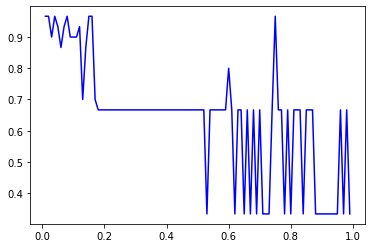

In [22]:
plt.plot(x,y,c='b')

In [23]:
print("201501489 최영진")

201501489 최영진
